<a href="https://colab.research.google.com/github/jimmy-io/worksheeets-/blob/master/python_stats_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting

In [146]:
data = pd.read_csv('/content/drive/My Drive/Insight/Brain Size Data.csv')
data  

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,¥,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65,951545
5,Female,99,90,110,146,69,928799
6,Female,138,136,131,138,64.5,991305
7,Female,92,90,98,175,66,854258
8,Male,89,93,84,134,66.3,904858
9,Male,133,114,147,172,68.8,955466


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     40 non-null     object
 1   FSIQ       40 non-null     int64 
 2   VIQ        40 non-null     int64 
 3   PIQ        40 non-null     int64 
 4   Weight     40 non-null     object
 5   Height     40 non-null     object
 6   MRI_Count  40 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.3+ KB


In [0]:
data = data.drop([1,20],axis = 0)

In [149]:
data

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65,951545
5,Female,99,90,110,146,69,928799
6,Female,138,136,131,138,64.5,991305
7,Female,92,90,98,175,66,854258
8,Male,89,93,84,134,66.3,904858
9,Male,133,114,147,172,68.8,955466
10,Female,132,129,124,118,64.5,833868


In [0]:
to_int = lambda x: float(x)

data['Height'] = data['Height'].apply(to_int)
data['Weight'] = data['Weight'].apply(to_int)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     38 non-null     object 
 1   FSIQ       38 non-null     int64  
 2   VIQ        38 non-null     int64  
 3   PIQ        38 non-null     int64  
 4   Weight     38 non-null     float64
 5   Height     38 non-null     float64
 6   MRI_Count  38 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.4+ KB


In [104]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [109]:
groupby_gender = data.groupby('Gender')
groupby_gender.mean()

,FSIQ,VIQ,PIQ,MRI_Count
Gender,,,,
Female,111.9,109.45,110.45,862654.6
Male,115.0,115.25,111.60,954855.4


Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

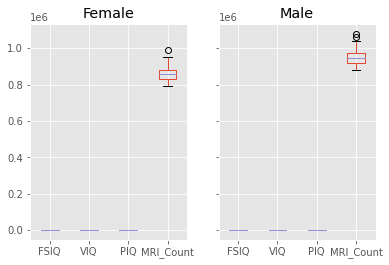

In [111]:
groupby_gender.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33617b2470>,
      dtype=object)

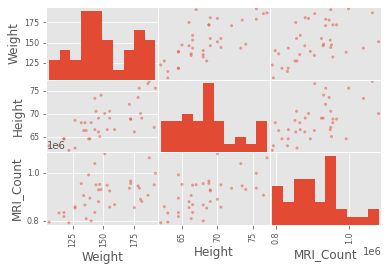

In [135]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

## Hypothesis testing: comparing two groups

In [136]:
stats.ttest_1samp(data['VIQ'], 0)
##scipy.stats.ttest_1samp() tests if the population mean of data is likely to be 
##equal to a given value (technically if observations are drawn from a Gaussian 
##distributions of given population mean). It returns the T statistic, and the p-value

Ttest_1sampResult(statistic=30.132405743476752, pvalue=1.2294004595027533e-27)

In [137]:
data['VIQ'].mean()

112.13157894736842

In [138]:
stats.ttest_1samp(data['VIQ'], 110)

Ttest_1sampResult(statistic=0.5728056477872849, pvalue=0.570241127844575)

In [139]:
## We have seen above that the mean VIQ in the male and female populations were
## different. To test if this is significant, we do a 2-sample t-test 
## with scipy.stats.ttest_ind()

print(data[data['Gender'] == 'Male']['VIQ'].mean(),
data[data['Gender'] == 'Female']['VIQ'].mean())

115.11111111111111 109.45


In [0]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']

In [141]:
stats.ttest_ind(female_viq, male_viq) 

Ttest_indResult(statistic=-0.7551589849287512, pvalue=0.4550660394858371)

## Linear models, multiple factors, and analysis of variance


In [0]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data1 = pd.DataFrame({'x': x, 'y': y})


In [153]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           8.56e-08
Time:                        04:24:13   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [154]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.5703
Date:                Mon, 06 Apr 2020   Prob (F-statistic):              0.455
Time:                        04:24:28   Log-Likelihood:                -172.16
No. Observations:                  38   AIC:                             348.3
Df Residuals:                      36   BIC:                             351.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.160     21.

## Pairplot: scatter matrices

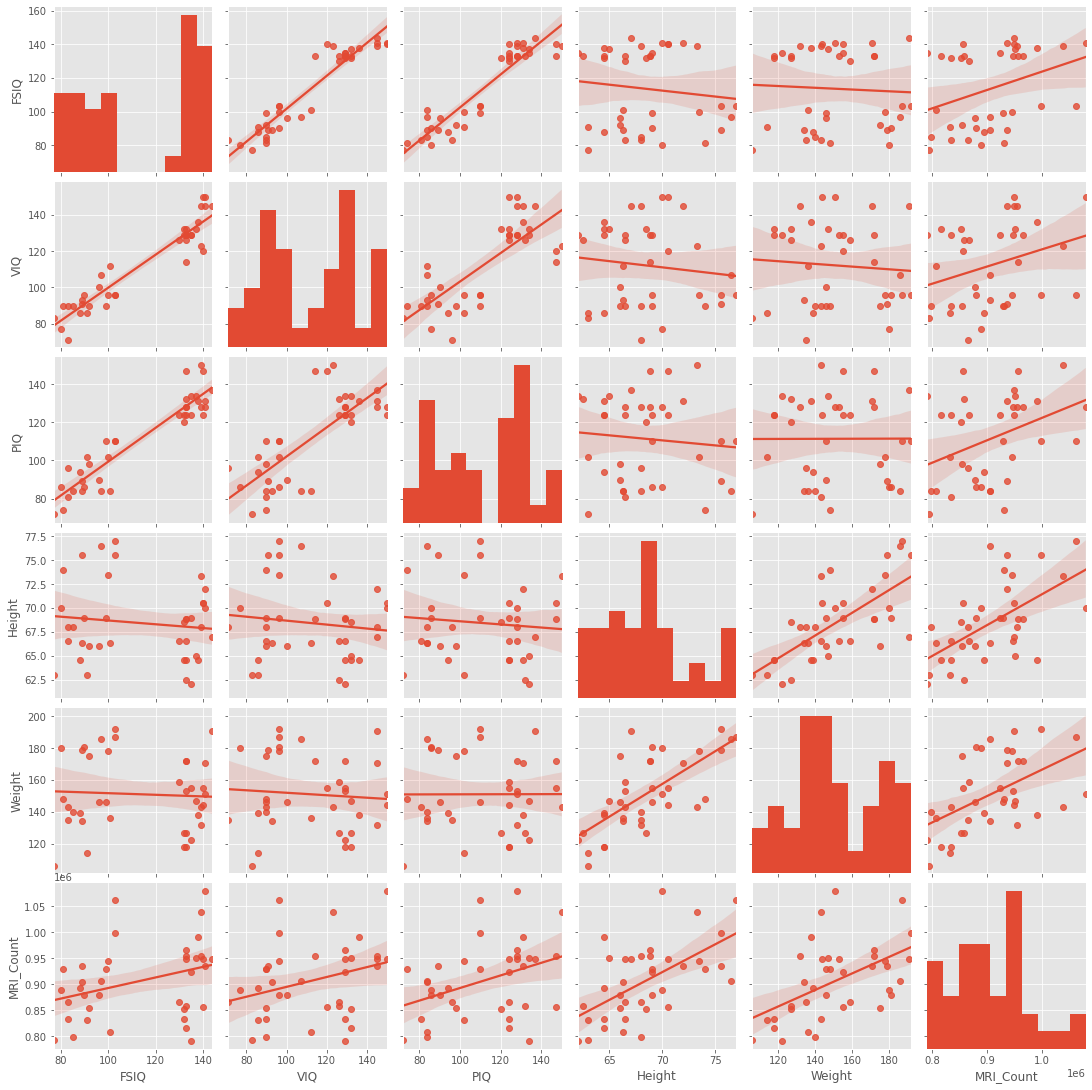

In [156]:
sns.pairplot(data, vars=['FSIQ','VIQ','PIQ','Height','Weight','MRI_Count'],
                 kind='reg')  

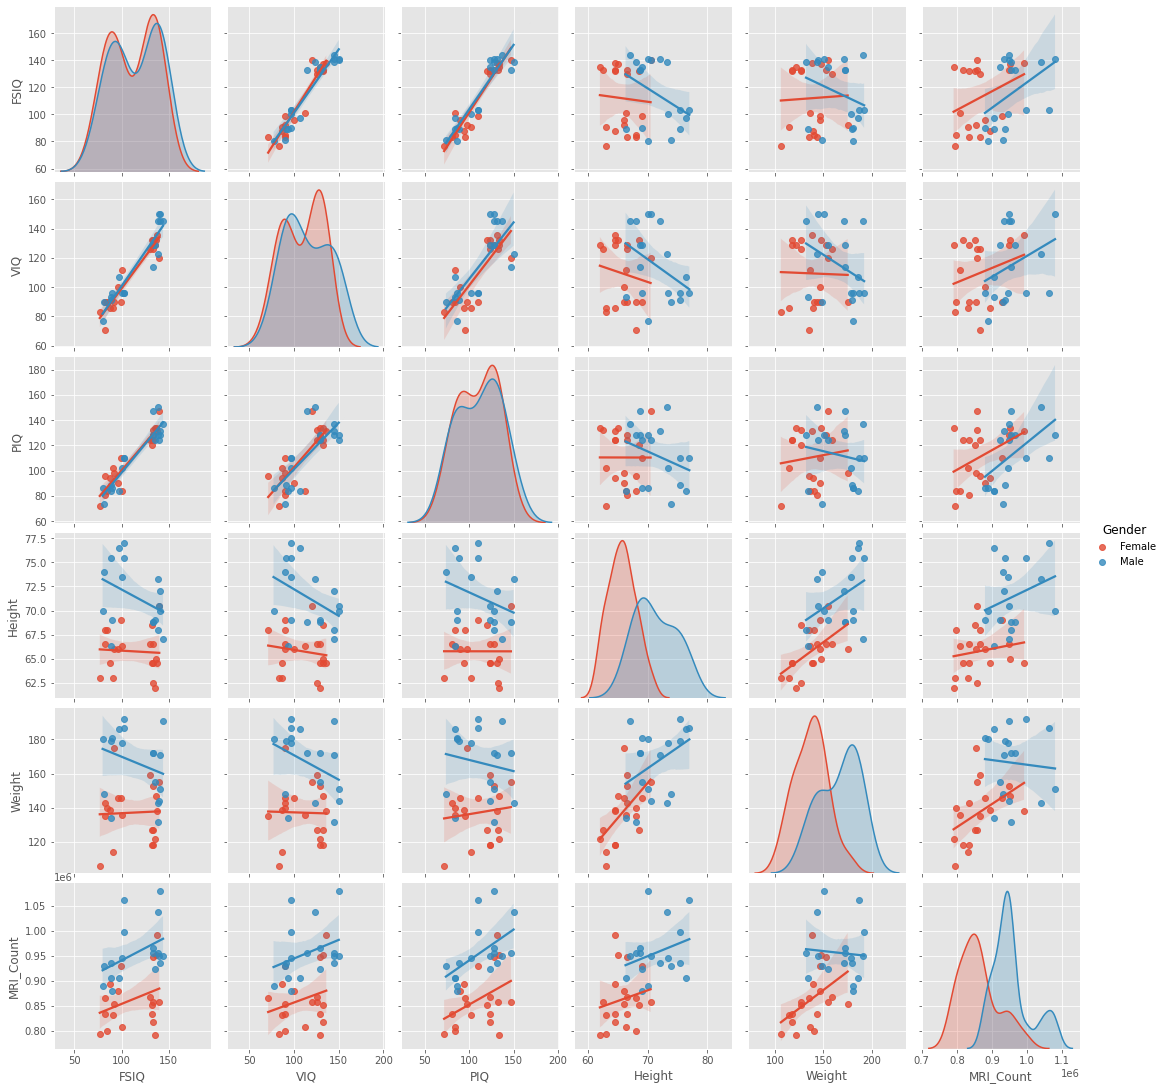

In [158]:
sns.pairplot(data, vars=['FSIQ','VIQ','PIQ','Height','Weight','MRI_Count'],
                 kind='reg', hue='Gender')